<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/Another_copy_of_Aerial_classification__Sample_ML_Submission_Template_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Aerial Object classification & Detection





##### **Project Type - Classification/supervised/deep learning




##### **Contribution**    - Individual


# **Project Summary -**

This project aims to develop a deep learning-based system capable of distinguishing between Birds and Drones in aerial images, addressing a critical need in security surveillance, wildlife protection, and airspace monitoring. Accurately identifying these objects helps prevent unauthorized drone activity, supports conservation efforts, and enhances overall situational awareness in sensitive environments.
The solution is built in two stages. First, a custom Convolutional Neural Network (CNN) is trained to classify aerial images into Bird or Drone categories. To achieve higher accuracy with efficient training, transfer learning is incorporated using pre-trained models such as ResNet or MobileNet. This significantly improves feature extraction and makes the model more reliable across diverse image conditions.
In the optional second stage, YOLOv8 is used for real-time object detection, allowing not just classification but also the ability to locate and label objects in complex scenes. This makes the system suitable for real-world monitoring scenarios where multiple objects may appear simultaneously.

The entire system is deployed through a Streamlit application, providing an interactive and easy-to-use interface where users can upload images and receive instant predictions. This deployment ensures accessibility, making the solution practical for field use and experimentation.

# **GitHub Link -**

https://github.com/sreeproject/AI-/blob/main/Another_copy_of_Aerial_classification__Sample_ML_Submission_Template_2.ipynb

# **Problem Statement**


This project aims to develop a deep learning-based solution that can classify aerial images into two categories — Bird or Drone — and optionally perform object detection to locate and label these objects in real-world scenes.
The solution will help in security surveillance, wildlife protection, and airspace safety where accurate identification between drones and birds is critical. The project involves building a Custom CNN classification model, leveraging transfer learning, and optionally implementing YOLOv8 for real-time object detection. The final solution will be deployed using Streamlit for interactive use.




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import dataset,dataloader
import glob
import cv2
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Aerial/dataset.zip'  # 🔁 Change this
extract_path = '/content/drive/MyDrive/Aerial/dataset'  # Destination folder


# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# -------------------------------
# 1. Inspect Dataset Folder Structure
# -------------------------------
def show_structure(root, level=0):
    if level > 2:
        return
    for item in os.listdir(root):
        path = os.path.join(root, item)
        print("   " * level + "|--", item)
        if os.path.isdir(path):
            show_structure(path, level + 1)

dataset_path="/content/drive/MyDrive/Aerial/dataset/datasets/dataset"         # Corrected path to the extracted dataset root directory
print("📂 DATASET STRUCTURE:")
show_structure(dataset_path)

In [ ]:
import torch
torch.cuda.is_available()

### Dataset Loading

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Aerial/dataset.zip'  # 🔁 Change this
extract_path = '/content/drive/MyDrive/Aerial/dataset/datasets'  # Destination folder


# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# List extracted folders/files
os.listdir(extract_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/drive/MyDrive/Aerial/dataset/dataset/train-20251119T213524Z-1-001'
val_dir = '/content/drive/MyDrive/Aerial/dataset/dataset/valid-20251119T214201Z-1-001'
test_dir = '/content/drive/MyDrive/Aerial/dataset/dataset/test-20251119T213457Z-1-001'

In [ ]:
os.listdir('/content/drive/MyDrive/Aerial/dataset/dataset')

Datasets view

In [ ]:
category1=os.listdir(train_dir)
category1

In [ ]:
category2=os.listdir(val_dir)
category2

In [ ]:
category3=os.listdir(test_dir)
category3

In [ ]:
#Define Data Generators

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255, #Converts pixel values from 0–255 to 0–1, which helps the model train faster and more accurately
    rotation_range=20, #Randomly rotates images up to 20 degrees
    zoom_range=0.2, #Randomly zooms images in/out by 20% to make the model
    horizontal_flip=True #Randomly flips images left↔right.
)

# Just rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255) #rescale val images
test_datagen = ImageDataGenerator(rescale=1./255) #rescale test images


In [ ]:
#Load Data from Folders

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='categorical'  # or 'binary' for 2 classes
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


#### Pick test and Display Sample Images(train,val,test)

In [ ]:
# Pick test and Display Sample Images
from tensorflow.keras.preprocessing.image import load_img

base_test_data_path = os.path.join(train_dir, 'train')

# Get the list of actual class names (e.g., 'bird', 'drone', etc.)
actual_class_names = sorted(os.listdir(base_test_data_path))

# Ensure minimum 2 classes exist
if len(actual_class_names) >= 2:

    # Pick first and second class names
    class1 = actual_class_names[0]   # e.g., bird
    class2 = actual_class_names[1]   # e.g., drone

    classes_to_display = [class1, class2]

    for cls in classes_to_display:
        print(f"\nDisplaying sample images from class: {cls}")

        class_folder = os.path.join(base_test_data_path, cls)

        # Get image files
        image_files = [
            f for f in os.listdir(class_folder)
            if os.path.isfile(os.path.join(class_folder, f))
        ]

        if image_files:
            for i in range(min(5, len(image_files))):
                img_path = os.path.join(class_folder, image_files[i])
                img = load_img(img_path, target_size=(224, 224))
                plt.imshow(img)
                plt.title(f"Class: {cls}")
                plt.axis('off')
                plt.show()
        else:
            print(f"No images found in: {class_folder}")

else:
    print("Need at least TWO class folders inside the test directory.")

In [ ]:
# Pick test and Display Sample Images

base_test_data_path = os.path.join(val_dir, 'valid')

# Get the list of actual class names (e.g., 'bird', 'drone', etc.)
actual_class_names = sorted(os.listdir(base_test_data_path))

# Ensure minimum 2 classes exist
if len(actual_class_names) >= 2:

    # Pick first and second class names
    class1 = actual_class_names[0]   # e.g., bird
    class2 = actual_class_names[1]   # e.g., drone

    classes_to_display = [class1, class2]

    for cls in classes_to_display:
        print(f"\nDisplaying sample images from class: {cls}")

        class_folder = os.path.join(base_test_data_path, cls)

        # Get image files
        image_files = [
            f for f in os.listdir(class_folder)
            if os.path.isfile(os.path.join(class_folder, f))
        ]

        if image_files:
            for i in range(min(5, len(image_files))):
                img_path = os.path.join(class_folder, image_files[i])
                img = load_img(img_path, target_size=(224, 224))
                plt.imshow(img)
                plt.title(f"Class: {cls}")
                plt.axis('off')
                plt.show()
        else:
            print(f"No images found in: {class_folder}")

else:
    print("Need at least TWO class folders inside the test directory.")

In [ ]:
# Pick test and Display Sample Images

base_test_data_path = os.path.join(test_dir, 'test')

# Get the list of actual class names (e.g., 'bird', 'drone', etc.)
actual_class_names = sorted(os.listdir(base_test_data_path))

# Ensure minimum 2 classes exist
if len(actual_class_names) >= 2:

    # Pick first and second class names
    class1 = actual_class_names[0]   # e.g., bird
    class2 = actual_class_names[1]   # e.g., drone

    classes_to_display = [class1, class2]

    for cls in classes_to_display:
        print(f"\nDisplaying sample images from class: {cls}")

        class_folder = os.path.join(base_test_data_path, cls)

        # Get image files
        image_files = [
            f for f in os.listdir(class_folder)
            if os.path.isfile(os.path.join(class_folder, f))
        ]

        if image_files:
            for i in range(min(5, len(image_files))):
                img_path = os.path.join(class_folder, image_files[i])
                img = load_img(img_path, target_size=(224, 224))
                plt.imshow(img)
                plt.title(f"Class: {cls}")
                plt.axis('off')
                plt.show()
        else:
            print(f"No images found in: {class_folder}")

else:
    print("Need at least TWO class folders inside the test directory.")

In [ ]:
#Show Random Images from All Classes - train

import random

# The 'train_dir' currently points to a folder like 'train-20251119T213524Z-1-001'
# Inside this, there's another folder 'train' which contains the actual class folders (bird, drone, etc.)
# So, the real base path containing the class directories is:
base_train_data_path = os.path.join(train_dir, 'train')

# Get the list of actual class names (e.g., 'bird', 'drone', etc.)
actual_class_names = os.listdir(base_train_data_path)

for label in actual_class_names:
    class_images_folder = os.path.join(base_train_data_path, label)

    # Ensure we are only listing files, not subdirectories within the class folder
    image_files = [f for f in os.listdir(class_images_folder) if os.path.isfile(os.path.join(class_images_folder, f))]

    if image_files:
        img_file = random.choice(image_files)
        img_path = os.path.join(class_images_folder, img_file)

        img = load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"Class: {label}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No image files found in class folder: {class_images_folder}")

In [ ]:
#Show Random Images from All Classes - val

import random

# The 'val_dir' currently points to a folder like 'valid-20251119T214201Z-1-001'
# Inside this, there's another folder 'valid' which contains the actual class folders (bird, drone, etc.)
# So, the real base path containing the class directories is:
base_val_data_path = os.path.join(val_dir, 'valid')

# Get the list of actual class names (e.g., 'bird', 'drone', etc.)
actual_class_names = os.listdir(base_val_data_path)

if actual_class_names: # Ensure there are classes to display
    for label in actual_class_names:
        class_images_folder = os.path.join(base_val_data_path, label)

        # Ensure we are only listing files, not subdirectories within the class folder
        image_files = [f for f in os.listdir(class_images_folder) if os.path.isfile(os.path.join(class_images_folder, f))]

        if image_files:
            img_file = random.choice(image_files)
            img_path = os.path.join(class_images_folder, img_file)

            img = load_img(img_path, target_size=(224, 224))
            plt.imshow(img)
            plt.title(f"Class: {label}")
            plt.axis('off')
            plt.show()
        else:
            print(f"No image files found in class folder: {class_images_folder}")
else:
    print(f"No class folders found in: {base_val_data_path}")

In [ ]:
#Show Random Images from All Classes - test

import random

# The 'test_dir' currently points to a folder like 'test-20251119T213457Z-1-001'
# Inside this, there's another folder 'test' which contains the actual class folders (bird, drone, etc.)
# So, the real base path containing the class directories is:
base_test_data_path = os.path.join(test_dir, 'test')

# Get the list of actual class names (e.g., 'bird', 'drone', etc.)
actual_class_names = os.listdir(base_test_data_path)

if actual_class_names: # Ensure there are classes to display
    for label in actual_class_names:
        class_images_folder = os.path.join(base_test_data_path, label)

        # Ensure we are only listing files, not subdirectories within the class folder
        image_files = [f for f in os.listdir(class_images_folder) if os.path.isfile(os.path.join(class_images_folder, f))]

        if image_files:
            img_file = random.choice(image_files)
            img_path = os.path.join(class_images_folder, img_file)

            img = load_img(img_path, target_size=(224, 224))
            plt.imshow(img)
            plt.title(f"Class: {label}")
            plt.axis('off')
            plt.show()
        else:
            print(f"No image files found in class folder: {class_images_folder}")
else:
    print(f"No class folders found in: {base_test_data_path}")

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import glob

path = r'/content/drive/MyDrive/Aerial/dataset/dataset/train-20251119T213524Z-1-001/train/*/*.jpg'

files = glob.glob(path)
if files:
    img_path = files[0]  # just pick the first one
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()
else:
    print("No images found in folder.")


### Dataset Rows & Columns count

In [ ]:
print("Class indices:", train_generator.class_indices)
print("\nTraining Images per Class:")
for cls, idx in train_generator.class_indices.items():
    print(f"{cls}: {train_generator.labels.tolist().count(idx)}")

print("\nValidation Images per Class:")
for cls, idx in val_generator.class_indices.items():
    print(f"{cls}: {val_generator.labels.tolist().count(idx)}")

print("\nTest Images per Class:")
for cls, idx in test_generator.class_indices.items():
    print(f"{cls}: {test_generator.labels.tolist().count(idx)}")

Train contains 2662 images, valid contains 442 images and test contains 215 images.

### Dataset Information

In [ ]:
# Path to images inside extracted folder

data_dir1 = '/content/drive/MyDrive/Aerial/dataset/dataset/train-20251119T213524Z-1-001/train/*/*.jpg'
train = []
for f in glob.glob(data_dir1, recursive=True):
    img = cv2.imread(f)
    if img is not None:
        train.append(img)
    else:
        print(f"Failed to load: {f}")

print(f"Total images loaded: {len(train)}")

In [ ]:
# Path to images inside extracted folder

data_dir2 = '/content/drive/MyDrive/Aerial/dataset/dataset/valid-20251119T214201Z-1-001/valid/*/*.jpg'
valid = []
for f in glob.glob(data_dir2, recursive=True):
    img = cv2.imread(f)
    if img is not None:
        valid.append(img)
    else:
        print(f"Failed to load: {f}")

print(f"Total images loaded: {len(valid)}")

In [ ]:
# Path to images inside extracted folder

data_dir3 = '/content/drive/MyDrive/Aerial/dataset/dataset/test-20251119T213457Z-1-001/test/*/*.jpg'
test = []
for f in glob.glob(data_dir3, recursive=True):
    img = cv2.imread(f)
    if img is not None:
        test.append(img)
    else:
        print(f"Failed to load: {f}")

print(f"Total images loaded: {len(test)}")

In [ ]:
from collections import defaultdict
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct root path to the training data (containing class subfolders)
train_root_path = "/content/drive/MyDrive/Aerial/dataset/dataset/train-20251119T213524Z-1-001/train"

# Step 1: Collect class-wise image counts and image resolutions
class_counts = defaultdict(int)
image_sizes = []

# Walk through the dataset
# List class names (e.g., 'bird', 'drone')
if os.path.isdir(train_root_path):
    for class_name in os.listdir(train_root_path):
        class_dir = os.path.join(train_root_path, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, image_name)
                # Ensure it's an image file before trying to open
                if os.path.isfile(img_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    try:
                        with Image.open(img_path) as img:
                            class_counts[class_name] += 1
                            image_sizes.append(img.size)
                    except Exception as e:
                        print(f"Skipping image: {img_path} | Error: {e}")
        else:
            print(f"Warning: {class_dir} is not a directory. Skipping.")
else:
    print(f"Error: Training root path {train_root_path} not found.")


# Step 2: Convert to DataFrame
df_counts = pd.DataFrame(list(class_counts.items()), columns=['bird_Type', 'Image_Count'])
df_sizes = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Step 3: Plot Class Distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=df_counts, x='bird_Type', y='Image_Count', palette='Set2')
plt.title("Class Distribution (Types)")
plt.ylabel("Number of Images")
plt.xlabel("Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Plot Image Resolution Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_sizes['Width'], color='skyblue', kde=True, label='Width', bins=30)
sns.histplot(df_sizes['Height'], color='orange', kde=True, label='Height', bins=30)
plt.title("Image Resolution Distribution")
plt.xlabel("Pixels")
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Print summary statistics
print("Class Distribution:\n", df_counts)
print("\nImage Resolution Stats:\n", df_sizes.describe())

1,This bar chart, labeled "Class Distribution (Types)", displays the number of images for two classes currently named "bird" and "drone". The dataset exhibits a relatively balanced distribution, with the "bird" class having approximately 1,400 images and the "drone" class having approximately 1,250 images. This close ratio of samples between the two classes is generally beneficial for training, as it helps prevent the classification model from being significantly biased towards the larger class.

2,This histogram illustrates that the image dataset has a uniform resolution, concentrated solely at 416 pixels for both width and height. The plot shows a single, dominant bar near $x=416.0$ for both the Width (blue) and Height (orange) of the images. This indicates that all images in the dataset have the exact same resolution, which is ideal for deep learning models as it eliminates the need for variable resizing before processing.

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_counts['Image_Count'], labels=df_counts['bird_Type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("bird Class Distribution (Pie Chart)")
plt.tight_layout()
plt.show()

This pie chart visualizes the distribution of samples between the "bird" and "drone" classes in the dataset. The dataset shows a minor imbalance, with the "bird" class comprising 53.1% of the total samples and the "drone" class making up the remaining 46.9%. Given that the class percentages are relatively close, this distribution is considered mostly balanced, and should not significantly affect model training performance.

In [ ]:
from collections import defaultdict
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct path to the validation data (containing class subfolders)
# Using val_dir defined previously, and navigating into its 'valid' subfolder
dataset_path1 = os.path.join(val_dir, 'valid')

# Step 1: Collect class-wise image counts and image resolutions
class_counts = defaultdict(int)
image_sizes = []

# Walk through the dataset
if os.path.isdir(dataset_path1):
    for class_name in os.listdir(dataset_path1):
        class_dir = os.path.join(dataset_path1, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, image_name)
                # Ensure it's an image file before trying to open
                if os.path.isfile(img_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    try:
                        with Image.open(img_path) as img:
                            class_counts[class_name] += 1
                            image_sizes.append(img.size)
                    except Exception as e:
                        print(f"Skipping image: {img_path} | Error: {e}")
        else:
            print(f"Warning: {class_dir} is not a directory. Skipping.")
else:
    print(f"Error: Validation root path {dataset_path1} not found.")

# Step 2: Convert to DataFrame
df_counts2 = pd.DataFrame(list(class_counts.items()), columns=['Bird_Type', 'Image_Count'])
df_sizes = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Step 3: Plot Class Distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=df_counts2, x='Bird_Type', y='Image_Count', palette='Set2')
plt.title("Class Distribution (Types)")
plt.ylabel("Number of Images")
plt.xlabel(" Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Plot Image Resolution Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_sizes['Width'], color='skyblue', kde=True, label='Width', bins=30)
sns.histplot(df_sizes['Height'], color='orange', kde=True, label='Height', bins=30)
plt.title("Image Resolution Distribution")
plt.xlabel("Pixels")
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Print summary statistics
print("Class Distribution:\n", df_counts2)
print("\nImage Resolution Stats:\n", df_sizes.describe())

1,This bar chart, labeled "Class Distribution (Types)", shows the number of images for the two classes: "bird" and "drone". The dataset is highly balanced, as both classes contain a very similar number of images, with each class having approximately 215 to 220 samples. This nearly equal distribution is optimal for training a classification model, as it minimizes the risk of the model developing a bias towards the class with more samples.

2,This histogram displays the Image Resolution Distribution for the dataset. The plot shows a single, prominent bar at 416.0 pixels for both Width and Height, indicating a perfect uniformity in image dimensions. This means that all 424 images in the dataset share the exact same resolution, which is highly beneficial as it simplifies data preprocessing for deep learning models by eliminating variable resizing.

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_counts2['Image_Count'], labels=df_counts2['Bird_Type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("fish Class Distribution (Pie Chart)")
plt.tight_layout()
plt.show()

This pie chart, titled "fish Class Distribution," visualizes the proportion of samples for the "bird" and "drone" classes. The dataset is almost perfectly balanced, with the "drone" class representing 50.8% and the "bird" class representing 49.2% of the total samples. This highly equitable distribution is optimal for model training, as it ensures the classification algorithm does not favor one class due to over-representation.

In [ ]:
from collections import defaultdict
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct path to the test data (containing class subfolders)
dataset_path2 = os.path.join(test_dir, 'test')

# Step 1: Collect class-wise image counts and image resolutions
class_counts = defaultdict(int)
image_sizes = []

# Walk through the dataset
if os.path.isdir(dataset_path2):
    for class_name in os.listdir(dataset_path2):
        class_dir = os.path.join(dataset_path2, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, image_name)
                # Ensure it's an image file before trying to open
                if os.path.isfile(img_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    try:
                        with Image.open(img_path) as img:
                            class_counts[class_name] += 1
                            image_sizes.append(img.size)
                    except Exception as e:
                        print(f"Skipping image: {img_path} | Error: {e}")
        else:
            print(f"Warning: {class_dir} is not a directory. Skipping.")
else:
    print(f"Error: Test root path {dataset_path2} not found.")

# Step 2: Convert to DataFrame
df_counts3 = pd.DataFrame(list(class_counts.items()), columns=['Bird_Type', 'Image_Count'])
df_sizes = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Step 3: Plot Class Distribution
plt.figure(figsize=(8, 5))
sns.barplot(data = df_counts3, x='Bird_Type', y='Image_Count', palette='Set2')
plt.title("Class Distribution (Types)")
plt.ylabel("Number of Images")
plt.xlabel("Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Plot Image Resolution Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_sizes['Width'], color='skyblue', kde=True, label='Width', bins=30)
sns.histplot(df_sizes['Height'], color='orange', kde=True, label='Height', bins=30)
plt.title("Image Resolution Distribution")
plt.xlabel("Pixels")
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Print summary statistics
print("Class Distribution:\n", df_counts3)
print("\nImage Resolution Stats:\n", df_sizes.describe())

1,This bar chart, labeled "Class Distribution (Types)", displays the number of images for the two classes, "bird" and "drone". The dataset shows a minor imbalance in sample count, with the "bird" class having approximately 120 images and the "drone" class having about 95 images. While the distribution is not perfectly equal, the ratio is relatively close, meaning this slight imbalance is unlikely to pose a significant problem for most model training.

2,This histogram, titled "Image Resolution Distribution", clearly shows that all images in the dataset possess the exact same resolution. Both the Width (blue) and Height (orange) measurements are perfectly concentrated at 416.0 pixels. This uniformity is a highly desirable characteristic for training deep learning models, as it eliminates the need for variable resizing and guarantees consistent input dimensions.

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_counts3['Image_Count'], labels=df_counts3['Bird_Type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("fish Class Distribution (Pie Chart)")
plt.tight_layout()
plt.show()

This pie chart, titled "fish Class Distribution," visualizes the sample proportions for the "bird" and "drone" classes. The dataset exhibits a moderate imbalance, with the "bird" class comprising 56.3% of the samples, significantly more than the "drone" class at 43.7%. This disparity suggests the model might be slightly biased toward the "bird" class, which could potentially impact its ability to generalize accurately to the underrepresented "drone" class.

In [ ]:
import pathlib

data_dir='/content/drive/MyDrive/Aerial/dataset/datasets/dataset/' # Corrected data_dir to point to the root of the extracted dataset
data_dir = pathlib.Path(data_dir)

In [ ]:
# Define transformations (resize 224 × 224, normalize[0, 1], augment train)
#import pathlib
train_formtransform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),
        scale=(0.9, 1.1)
    ),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()      # → normalizes images to [0,1]
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
val_dir = os.path.join(data_dir, 'valid-20251119T214201Z-1-001', 'valid') # Corrected path for ImageFolder
test_dir = os.path.join(data_dir, 'test-20251119T213457Z-1-001', 'test') # Corrected path for ImageFolder
train_dir = os.path.join(data_dir, 'train-20251119T213524Z-1-001', 'train') # Corrected path for ImageFolder
train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset = ImageFolder(val_dir, transform=transform)
test_dataset = ImageFolder(test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Class names
classes = train_dataset.classes
print("Train Classes:", classes)
classes1 = val_dataset.classes
print("valid Classes:", classes1)
classes2 = test_dataset.classes
print("test Classes:", classes2)

In [ ]:
# Pick test and Display Sample Images

base_test_data_path = train_dir # Corrected: test_dir already points to the correct base path

# Get class folders (ex: ['bird', 'drone'])
actual_class_names = sorted(os.listdir(base_test_data_path))

# Make sure we have at least 2 folders
if len(actual_class_names) >= 2:

    # Take FIRST and SECOND folders (ex: bird, drone)
    class1 = actual_class_names[0]   # example: bird
    class2 = actual_class_names[1]   # example: drone

    classes_to_display = [class1, class2]

    for cls in classes_to_display:
        print(f"\nDisplaying sample images from class: {cls}")

        class_folder = os.path.join(base_test_data_path, cls)

        # Read images
        image_files = [
            f for f in os.listdir(class_folder)
            if os.path.isfile(os.path.join(class_folder, f))
        ]

        # Show 5 images
        if image_files:
            for i in range(min(5, len(image_files))):
                img_path = os.path.join(class_folder, image_files[i])
                img = load_img(img_path, target_size=(224, 224))
                plt.imshow(img)
                plt.title(f"Class: {cls}")
                plt.axis('off')
                plt.show()
        else:
            print(f"No images found in: {class_folder}")

else:
    print("There must be at least TWO class folders inside the test directory.")

In [ ]:
# Pick test and Display Sample Images

base_test_data_path = val_dir # Corrected: test_dir already points to the correct base path

# Get class folders (ex: ['bird', 'drone'])
actual_class_names = sorted(os.listdir(base_test_data_path))

# Make sure we have at least 2 folders
if len(actual_class_names) >= 2:

    # Take FIRST and SECOND folders (ex: bird, drone)
    class1 = actual_class_names[0]   # example: bird
    class2 = actual_class_names[1]   # example: drone

    classes_to_display = [class1, class2]

    for cls in classes_to_display:
        print(f"\nDisplaying sample images from class: {cls}")

        class_folder = os.path.join(base_test_data_path, cls)

        # Read images
        image_files = [
            f for f in os.listdir(class_folder)
            if os.path.isfile(os.path.join(class_folder, f))
        ]

        # Show 5 images
        if image_files:
            for i in range(min(5, len(image_files))):
                img_path = os.path.join(class_folder, image_files[i])
                img = load_img(img_path, target_size=(224, 224))
                plt.imshow(img)
                plt.title(f"Class: {cls}")
                plt.axis('off')
                plt.show()
        else:
            print(f"No images found in: {class_folder}")

else:
    print("There must be at least TWO class folders inside the test directory.")

In [ ]:
# Pick test and Display Sample Images

base_test_data_path = test_dir # Corrected: test_dir already points to the correct base path

# Get class folders (ex: ['bird', 'drone'])
actual_class_names = sorted(os.listdir(base_test_data_path))

# Make sure we have at least 2 folders
if len(actual_class_names) >= 2:

    # Take FIRST and SECOND folders (ex: bird, drone)
    class1 = actual_class_names[0]   # example: bird
    class2 = actual_class_names[1]   # example: drone

    classes_to_display = [class1, class2]

    for cls in classes_to_display:
        print(f"\nDisplaying sample images from class: {cls}")

        class_folder = os.path.join(base_test_data_path, cls)

        # Read images
        image_files = [
            f for f in os.listdir(class_folder)
            if os.path.isfile(os.path.join(class_folder, f))
        ]

        # Show 5 images
        if image_files:
            for i in range(min(5, len(image_files))):
                img_path = os.path.join(class_folder, image_files[i])
                img = load_img(img_path, target_size=(224, 224))
                plt.imshow(img)
                plt.title(f"Class: {cls}")
                plt.axis('off')
                plt.show()
        else:
            print(f"No images found in: {class_folder}")

else:
    print("There must be at least TWO class folders inside the test directory.")

#### Data Augmentation Pipeline

In [ ]:
#Full Data Augmentation Pipeline (Recommended)
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),                       # Initial resize (safer for cropping)

    # ---- Data Augmentation ----
    transforms.RandomRotation(30),                       # Rotation
    transforms.RandomHorizontalFlip(p=0.5),              # Flip left-right
    transforms.RandomVerticalFlip(p=0.3),                # Flip up-down
    transforms.RandomAffine(
        degrees=0,
        scale=(0.8, 1.2),                                # Zoom in/out
        translate=(0.1, 0.1)                             # Random shifts
    ),
    transforms.ColorJitter(
        brightness=0.2,                                  # Brightness +/- 20%
        contrast=0.2                                     # Contrast +/- 20%
    ),
    transforms.RandomResizedCrop(
        224,                                             # Final size = 224x224
        scale=(0.8, 1.0)                                 # Random crop (zoom-in effect)
    ),

    # ---- Convert to Tensor ----
    transforms.ToTensor(),                               # Converts to [0,1]

    # ---- Normalize to [0, 1] ----
    # Since ToTensor() already gives [0,1], no need for Normalize()
])

In [ ]:
#Validation Transform (no augmentation)
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),   # → values become [0, 1]
])


In [ ]:
#Test Transform (no augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),   # → values become [0, 1]
])

In [ ]:
from PIL import Image

def pil_loader(path):
    try:
        with open(path, "rb") as f:
            img = Image.open(f)
            return img.convert("RGB")
    except:
        print("Corrupted image skipped:", path)
        return None

In [ ]:
from torch.utils.data import Dataset

class SafeImageFolder(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        path, target = self.dataset.samples[idx]

        img = pil_loader(path)
        if img is None:
            # Skip bad image by getting next one
            return self.__getitem__((idx + 1) % len(self.dataset))

        if self.dataset.transform:
            img = self.dataset.transform(img)

        return img, target

In [ ]:
import torchvision
train_ds_raw = torchvision.datasets.ImageFolder(train_dir, transform=None)
train_dataset = SafeImageFolder(train_ds_raw)
train_dataset.dataset.transform = train_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
from PIL import Image
import os

bad_images = []

for root, dirs, files in os.walk(train_dir):
    for file in files:
        path = os.path.join(root, file)
        try:
            img = Image.open(path)
            img.verify()
        except:
            bad_images.append(path)

bad_images

Correpted images or bad images are skipped

###Model Building


####Custom CNN Model

In [ ]:
#PyTorch Custom CNN Model
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 112 × 112

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 56 × 56

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 28 × 28

            # Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 14 × 14
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 14 * 14, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)   # Flatten
        x = self.classifier(x)
        return x

In [ ]:
num_classes = len(train_dataset.dataset.classes)
model_cnn = CustomCNN(num_classes)

###2. Transfer Learning Models (ResNet50, MobileNetV2, EfficientNetB0)

###ResNet50

In [ ]:
#ResNet50
def build_resnet50(num_classes):
    model_50 = models.resnet50(pretrained=True)

    # Freeze feature layers
    for param in model_50.parameters():
        param.requires_grad = False

    # Replace final layer
    in_features = model_50.fc.in_features
    model_50.fc = nn.Linear(in_features, num_classes)

    return model_50

###MobileNetV2

In [ ]:
#MobileNetV2
def build_mobilenet(num_classes):
    model_netv2 = models.mobilenet_v2(pretrained=True)

    for param in model_netv2.features.parameters():
        param.requires_grad = False

    model_netv2.classifier[1] = nn.Linear(model_netv2.last_channel, num_classes)

    return model_netv2

###EfficientNet-B0

In [ ]:
#EfficientNet-B0
def build_efficientnet(num_classes):
    model_b0 = models.efficientnet_b0(pretrained=True)

    # Freeze convolution layers
    for param in model_b0.features.parameters():
        param.requires_grad = False

    # Replace classifier
    in_features = model_b0.classifier[1].in_features
    model_b0.classifier[1] = nn.Linear(in_features, num_classes)

    return model_b0

In [ ]:
#After initial training, you can unfreeze the last layers:

for param in model_50.layer4.parameters():   # For ResNet
    param.requires_grad = True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


###Model Training

In [ ]:
#Early Stopping + Model Checkpoint
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import copy
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.verbose = verbose

    def __call__(self, val_loss, model, save_path="best_model.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save(model.state_dict(), save_path)
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True


In [ ]:
#Training Function (Tracks Accuracy, Precision, Recall, F1)
def train_model(model, train_loader, val_loader, test_loader, criterion, optimizer, epochs=20, patience=5, save_path="best_model.pth"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    early_stopper = EarlyStopping(patience=patience, verbose=True)
    best_model_wts = copy.deepcopy(model.state_dict())

    history = {
        'train_loss': [], 'val_loss': [], 'test_loss': [],
        'train_acc': [], 'val_acc': [], 'test_acc': [],
        'train_precision': [], 'val_precision': [], 'test_precision': [],
        'train_recall': [], 'val_recall': [], 'test_recall': [],
        'train_f1': [], 'val_f1': [], 'test_f1': []
    }

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        print("-" * 40)

        # -------------------- Training --------------------
        model.train()
        train_loss = 0
        train_preds, train_labels = [], []

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)

            train_preds.extend(preds.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        avg_train_loss = train_loss / len(train_loader)
        train_acc = np.mean(np.array(train_preds) == np.array(train_labels))
        train_precision = precision_score(train_labels, train_preds, average='weighted', zero_division=0)
        train_recall = recall_score(train_labels, train_preds, average='weighted', zero_division=0)
        train_f1 = f1_score(train_labels, train_preds, average='weighted', zero_division=0)

        # -------------------- Validation --------------------
        model.eval()
        val_loss = 0
        val_preds, val_labels = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_acc = np.mean(np.array(val_preds) == np.array(val_labels))
        val_precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
        val_recall = recall_score(val_labels, val_preds, average='weighted', zero_division=0)
        val_f1 = f1_score(val_labels, val_preds, average='weighted', zero_division=0)

        # -------------------- Test --------------------
        model.eval()
        test_loss = 0
        test_preds, test_labels = [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                test_preds.extend(preds.cpu().numpy())
                test_labels.extend(labels.cpu().numpy())

        avg_test_loss = test_loss / len(test_loader)
        test_acc = np.mean(np.array(test_preds) == np.array(test_labels))
        test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
        test_recall = recall_score(test_labels, test_preds, average='weighted', zero_division=0)
        test_f1 = f1_score(test_labels, test_preds, average='weighted', zero_division=0)

        # Store history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['test_loss'].append(avg_test_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['test_acc'].append(test_acc)
        history['train_precision'].append(train_precision)
        history['val_precision'].append(val_precision)
        history['test_precision'].append(test_precision)
        history['train_recall'].append(train_recall)
        history['val_recall'].append(val_recall)
        history['test_recall'].append(test_recall)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)
        history['test_f1'].append(test_f1)


        # -------------------- Logging --------------------
        print(f"Train Loss: {avg_train_loss:.4f} |  Val Loss: {avg_val_loss:.4f} | Test Loss: {avg_test_loss:.4f}")
        print(f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
        print(f"Train F1: {train_f1:.4f} | Val F1: {val_f1:.4f} | Test F1: {test_f1:.4f}")

        # -------------------- Early Stopping --------------------
        early_stopper(avg_val_loss, model, save_path)

        if early_stopper.early_stop:
            print("Early stopping triggered.")
            break

    # Load best model weights
    model.load_state_dict(torch.load(save_path))
    return model, history

In [ ]:
#Train Custom CNN
num_classes = len(train_dataset.dataset.classes)
model_cnn = CustomCNN(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=1e-4)

trained_cnn = train_model(
    model_cnn,
    train_loader,
    val_loader,
    test_loader, # Added missing test_loader argument
    criterion,
    optimizer,
    epochs=30,
    patience=5,
    save_path="best_custom_cnn.pth"
)

###Test Accuracy	88.84%, Test Loss	0.272,F1 Score	0.888
> Add blockquote



The model performs well on unseen data, achieving 88.8% test accuracy with a low test loss of 0.27, indicating strong generalization.
Its F1 score of 0.88 shows that the model maintains a good balance between precision and recall for both Bird and Drone classes.
Overall, the evaluation metrics confirm that the classifier is reliable and effective for real-world aerial image identification.

###Train Transfer Learning

####ResNet50

In [ ]:
#ResNet50
model_50 = build_resnet50(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_50.fc.parameters(), lr=1e-4)

trained_resnet, resnet_history = train_model(
    model_50,
    train_loader,
    val_loader,
    test_loader, # Added missing test_loader argument
    criterion,
    optimizer,
    #epochs=20, # epochs will take default value or can be explicitly passed as a keyword arg
    patience=5,
    save_path="best_resnet50.pth"
)

Test Accuracy 96%, Test Loss 0.128,F1 Score 0.96

In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(history, model_name="ResNet"):

    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(14, 5))

    # ---------------- LOSS ----------------
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.plot(epochs, history['test_loss'], label='test Loss')
    plt.title(f'{model_name} Loss Curve')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    # ---------------- ACCURACY ----------------
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], label='Train Accuracy')
    plt.plot(epochs, history['val_acc'], label='Validation Accuracy')
    plt.plot(epochs, history['test_acc'], label='test Accuracy')
    plt.title(f'{model_name} Accuracy Curve')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
plot_training_curves(resnet_history, model_name="ResNet50")

The loss curves for training, validation, and test sets all decrease smoothly, showing stable learning with no major overfitting.

The accuracy curves rise consistently, reaching best accuracies of ~94.8% (train), ~95.0% (validation), and ~96.0% (test), indicating excellent model performance on all datasets.

Since the three curves remain close throughout training and the test set achieves the highest accuracy, the ResNet50 model generalizes very well and shows strong robustness on unseen data.

###MobileNetV2

In [ ]:
#MobileNetV2
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_netv2 = models.mobilenet_v2(weights="IMAGENET1K_V1")
model_netv2.classifier[1] = nn.Linear(model_netv2.last_channel, num_classes)
#mobilenet = mobilenet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_netv2.parameters(), lr=1e-4)

print("\n===== Training MobileNetV2 =====")
trained_mobilenet, mobilenet_history = train_model(
    model_netv2,
    train_loader,
    val_loader,
    test_loader,
    criterion,
    optimizer,
    epochs=20
)

torch.save(trained_mobilenet.state_dict(), "mobilenet_model.pth")
print("MobileNet model saved!")

Test Accuracy 98.6%, Test Loss 0.034,F1 Score 98.6

In [ ]:
plot_training_curves(mobilenet_history, model_name="mobilenet")

The Mobilenet training curves show that training loss steadily decreases to ~0.027 while validation loss (~0.06) and test loss (~0.08) remain slightly higher but stable, indicating good generalization. The model achieves a best training accuracy of ~99.6%, best validation accuracy of ~97.9%, and best test accuracy of ~98.7%, showing strong and consistent performance across all sets. Overall, the curves show minimal overfitting and demonstrate that Mobilenet is learning effectively with excellent accuracy on unseen test data.

###EfficientNet-B0

In [ ]:
#EfficientNet-B0
model_b0 = models.efficientnet_b0(weights="IMAGENET1K_V1")
model_b0.classifier[1] = nn.Linear(1280, num_classes)
#efficientnet = efficientnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_b0.parameters(), lr=1e-4)

print("\n===== Training EfficientNet-B0 =====")
trained_effnet, effnet_history = train_model(
    model_b0,
    train_loader,
    val_loader,
    test_loader,
    criterion,
    optimizer,
    epochs=20
)

torch.save(trained_effnet.state_dict(), "efficientnet_model.pth")
print("EfficientNet model saved!")

Test Accuracy 99.5%, Test Loss 0.018,F1 Score 99.5

In [ ]:
plot_training_curves(effnet_history, model_name="efficientnet")

The loss curves show the Training Loss steadily decreasing, while the Validation and Test Losses initially decrease but begin to fluctuate and slightly rise around epoch 7, suggesting potential overfitting. Conversely, all three Accuracy curves (Train, Validation, and Test) are high, hovering above 96% and peaking near 99%, indicating the model achieved excellent overall performance despite the minor divergence in the loss curves. The minor increase in validation/test loss along with sustained high accuracy suggests the model is highly effective, though the gap between training and validation/test loss after epoch 6 warrants monitoring for generalization issues.

###Evaluate the Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

def evaluate_model(model, test_loader, class_names):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Convert to arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # CONFUSION MATRIX
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # CLASSIFICATION REPORT
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
evaluate_model(model_50, test_loader, classes)

This analysis, based on a confusion matrix and classification report, evaluates a model's performance in distinguishing between "bird" and "drone" targets. The model achieved a high overall accuracy of 95% across 215 total test samples, indicating excellent predictive capability. For the "bird" class (121 samples), the model demonstrated a precision of 0.96 and a recall of 0.95, successfully identifying 115 true birds. For the "drone" class (94 samples), performance was nearly identical with a precision of 0.94 and a strong recall of 0.95, correctly identifying 89 true drones. The small number of misclassifications (5 drones mistaken for birds and 6 birds mistaken for drones) highlights the model's robustness and balanced performance across both classes. Consequently, the high, consistent F1-scores of 0.95 and 0.94 confirm that the model maintains a strong balance between correctness and completeness in its classifications.

In [ ]:
evaluate_model(model_netv2, test_loader, classes)

This model exhibits near-perfect performance in classifying between "bird" and "drone," achieving a remarkable overall accuracy of 0.99 (99%) across 215 samples. The confusion matrix shows only 1 misclassification for actual birds (predicted as drone) and 2 misclassifications for actual drones (predicted as bird), demonstrating minimal errors. Both the "bird" and "drone" classes achieved exceptional and balanced scores, with precision, recall, and F1-scores all at 0.98 or 0.99. These metrics confirm that the model is extremely accurate and reliable with very little bias or trade-off between identifying the two classes.

In [ ]:
evaluate_model(model_b0, test_loader, classes)

This model demonstrates very high overall performance in classifying birds vs. drones, achieving an impressive accuracy of 0.97 (97%) across 215 samples. The confusion matrix reveals minimal errors, with only 2 actual birds being misclassified as drones, and 4 actual drones being misclassified as birds. The "bird" class shows slightly better recall (0.98), correctly identifying 98% of all birds, while the "drone" class has slightly higher precision (0.98), meaning that when the model predicts a drone, it's correct 98% of the time. Both classes maintain a high balance of correctness and completeness, as reflected by the strong, consistent F1-scores of 0.98 and 0.97.

###Model Comparison

In [ ]:
#Create a Comparison Table

import time

model_results = []

def add_model_result(model_name, train_time, test_accuracy, f1_score):
    model_results.append({
        "Model": model_name,
        "Train_Time (sec)": round(train_time, 2),
        "Test_Accuracy": round(test_accuracy, 4),
        "F1_Score": round(f1_score, 4)
    })

In [ ]:
#Training Each Model, Measure Time

start = time.time()

resnet_history = train_model(model_50, train_loader, val_loader, test_loader, criterion, optimizer, epochs=15)

resnet_test_acc, resnet_f1 = test_model(model_50, test_loader)  # evaluation

end = time.time()
train_time = end - start

add_model_result("ResNet50", train_time, resnet_test_acc, resnet_f1)

In [ ]:
#Training Each Model, Measure Time

start = time.time()

resnet_history = train_model(model_netv2, train_loader, val_loader, test_loader, criterion, optimizer, epochs=15)

resnet_test_acc, resnet_f1 = test_model(model_netv2, test_loader)  # evaluation

end = time.time()
train_time = end - start

add_model_result("MobileNetV2", train_time, resnet_test_acc, resnet_f1)

In [ ]:
#Training Each Model, Measure Time

start = time.time()

resnet_history = train_model(model_b0, train_loader, val_loader, test_loader, criterion, optimizer, epochs=15)

# Corrected: Evaluate model_b0 and use assigned variable names
effnet_test_acc, effnet_f1 = test_model(model_b0, test_loader)  # evaluation

end = time.time()
train_time = end - start

# Corrected: Use the assigned variable names
add_model_result("EfficientNet-B0", train_time, effnet_test_acc, effnet_f1)

In [ ]:
#Function to Evaluate Accuracy + F1 Score

from sklearn.metrics import accuracy_score, f1_score

def test_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    return accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average='weighted')

In [ ]:
#After All Models Finish Training — Create DataFrame
import pandas as pd

df_results = pd.DataFrame(model_results)
print(df_results)

Looking at the table, we can compare the three models based on training time, test accuracy, and F1 score:

EfficientNet-B0 stands out as the best model overall. It achieved the highest test accuracy (0.9907) and highest F1 score (0.9907), indicating it performs best in correctly classifying images while maintaining a balance between precision and recall.

In terms of training time, EfficientNet-B0 is also slightly faster (379.20 sec) than MobileNetV2 (389.46 sec) and ResNet50 (393.20 sec), making it both accurate and efficient.

MobileNetV2 performs well too, with accuracy/F1 of 0.9814, but slightly lower than EfficientNet-B0. Its training time is marginally higher than EfficientNet-B0.

ResNet50 has the lowest accuracy (0.9628) and F1 score (0.9627), while taking the longest training time (393.20 sec). This makes it less favorable for this task.

✅ Conclusion: EfficientNet-B0 is the best choice because it achieves highest accuracy and F1 score while being faster to train than the other two models.

In [ ]:
#Save the Best Model for Streamlit Deployment

# Find the best model based on a metric, e.g., 'Test_Accuracy'
best_model_row = df_results.loc[df_results['Test_Accuracy'].idxmax()]

#Depending on the best model name, save the corresponding model object:

best_model_name = best_model_row["Model"]

if best_model_name == "ResNet50":
    best_model = trained_resnet # Changed from model_resnet
elif best_model_name == "MobileNetV2":
    best_model = trained_mobilenet # Changed from model_mobile
elif best_model_name == "EfficientNet-B0": # Corrected name
    best_model = trained_effnet # Changed from model_efficient
else:
    best_model = trained_cnn # Default to custom CNN if none matches or if it's the best

torch.save(best_model.state_dict(), "best_classification_model.pth")
print(f"Best model '{best_model_name}' saved as 'best_classification_model.pth'")

####Conclusion: EfficientNet-B0 is the best choice because it achieves highest accuracy and F1 score while being faster to train than the other two models

### Future Work

Future work could involve experimenting with larger or newer architectures like EfficientNet-B3/B4 or ResNet101 to improve accuracy.
Implementing ensemble learning by combining MobileNetV2, ResNet50, and EfficientNet-B0 predictions may boost performance and robustness.
Hyperparameter tuning such as adjusting learning rate, batch size, and epochs can reduce training time while maintaining high accuracy.
Deploying lightweight models like MobileNetV2 on edge devices can enable faster inference with minimal performance loss.
Finally, applying transfer learning on domain-specific datasets can enhance generalization and adapt the models for specialized applications.

##Object Detection with YOLOv8


YOLO (You Only Look Once) is a state-of-the-art object detection algorithm used to detect objects in images and videos in real time.

It is one of the fastest and most popular deep-learning models for:

✔ Detecting objects (cars, people, animals, drones, etc.)

✔ Drawing bounding boxes

✔ Giving class labels

✔ Giving confidence scores

YOLOv8 is the latest major release from Ultralytics, and it is one of the most powerful and flexible deep-learning models

In [ ]:
#Install YOLOv8
!pip install ultralytics

In [ ]:
#Prepare Dataset in YOLO Format

dataset.yaml Example

Create dataset.yaml:

path: /content/dataset

train: images/train

val: images/val

test: images/test

names:

  0: bird

  1: drone

In [ ]:
import os
import shutil

# Paths where your extracted files exist
src_train = "/content/drive/MyDrive/Aerial/dataset/datasets/dataset/train-20251119T213524Z-1-001/train"
src_val = "/content/drive/MyDrive/Aerial/dataset/datasets/dataset/valid-20251119T214201Z-1-001/valid"
src_test = "/content/drive/MyDrive/Aerial/dataset/datasets/dataset/test-20251119T213457Z-1-001/test"

# New YOLO dataset folder
dst_base = "/content/yolo_cls_dataset"
dst_train = f"{dst_base}/train"
dst_val = f"{dst_base}/val"
dst_test = f"{dst_base}/test"

# --- FIX START ---
# Remove the destination base directory if it already exists to ensure a clean copy
if os.path.exists(dst_base):
    shutil.rmtree(dst_base)
# --- FIX END ---

os.makedirs(dst_train, exist_ok=True)
os.makedirs(dst_val, exist_ok=True)
os.makedirs(dst_test, exist_ok=True)

# Copy class folders correctly
shutil.copytree(src_train, dst_train, dirs_exist_ok=True)
shutil.copytree(src_val, dst_val, dirs_exist_ok=True)
shutil.copytree(src_test, dst_test, dirs_exist_ok=True)

print("YOLOv8 Classification dataset created successfully!")

###Train yolov8

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s-cls.pt")

model.train(
    data="/content/yolo_cls_dataset",
    epochs=25,
    imgsz=224,
    batch=16,
    device='cpu' # Explicitly set device to CPU
)

The YOLOv8s classification model was trained for 25 epochs on a CPU, taking 3.484 hours.
It used 2662 training images, 442 validation images, and 215 test images across 2 classes.
The model achieved Top-1 accuracy of 0.989 (98.87%) and Top-5 accuracy of 1.0 (100%), showing excellent classification performance.
With 5,077,762 parameters and a fitness score of 0.9943, the model is both accurate and efficient for this dataset.

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/classify/train/weights/best.pt")

In [ ]:
#Validation on the Validation Set
model.val(
    data="/content/yolo_cls_dataset",
    split="val",
    device='cpu'
)

The YOLOv8s classification model was evaluated on the validation set of 442 images across 2 classes.
It achieved a Top-1 accuracy of 0.989 (98.87%) and Top-5 accuracy of 1.0 (100%), indicating excellent classification performance.
Each image took approximately 50.1 ms for inference, showing efficient prediction speed.
With 5,077,762 parameters and a fitness score of 0.9943, the model is both highly accurate and optimized for this dataset.

In [ ]:
#Validation on the Test Set
model.val(
    data="/content/yolo_cls_dataset",
    split="test",
    device='cpu'
)

The YOLOv8s classification model was tested on 215 images across 2 classes.
It achieved a Top-1 accuracy of 0.977 (97.67%) and Top-5 accuracy of 1.0 (100%), showing strong generalization to unseen data.
Each image took approximately 48.2 ms for inference, demonstrating efficient prediction speed.
With a fitness score of 0.9884, the model is both accurate and well-optimized for this test dataset.

####Run inference on new images.


In [ ]:
results = model("download.jpeg")
results[0].verbose()       # show prediction in console
results[0].show()

In [ ]:
results = model("download (1).jpeg")
results[0].verbose()       # show prediction in console
results[0].show()

###Conclusion

The YOLOv8s classification model demonstrates excellent performance on this dataset.
It achieved high accuracy across training (98.87%), validation (98.87%), and test (97.67%) sets, indicating strong learning and generalization.
Inference is fast and efficient, taking around 48–50 ms per image on a CPU.
Overall, the model is highly accurate, optimized, and reliable for classifying the two classes in your dataset.

# Future work

Future work could include training and inference on a GPU to significantly reduce computation time.
Applying data augmentation techniques like rotation, flipping, and color adjustments can improve model robustness.
Expanding the dataset with more classes or diverse samples may enhance accuracy and generalization.
Experimenting with larger YOLOv8 variants could achieve even higher classification performance.
Finally, deploying the model in real-time applications or web/mobile platforms would make it practically useful.

###Deployment

In [ ]:
!pip install streamlit

In [ ]:
#aerial.py
import streamlit as st
from ultralytics import YOLO
from PIL import Image
import torch
import numpy as np

# ---------------------------------------------------------
# Load YOLOv8 Classification Model
# ---------------------------------------------------------
#CLASSIFICATION_MODEL_PATH = "best.pt"   # Your best model path
#model_cls = YOLO(CLASSIFICATION_MODEL_PATH)

# (Optional) Load YOLO Detection Model
DETECTION_MODEL_PATH = "best.pt"     # Use only if needed
model_det = YOLO(DETECTION_MODEL_PATH)

# ---------------------------------------------------------
# Streamlit UI
# ---------------------------------------------------------
st.set_page_config(page_title="Bird vs Drone Classifier", layout="centered")
st.title("🛩️ YOLOv8 Aerial Image Classifier")
st.write("Upload an image to detect **Bird / Drone** with confidence score.")

uploaded_file = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])

mode = st.radio(
    "Select Mode",
    ["Classification (Bird / Drone)", "YOLO Detection (Bounding Boxes)"]
)

# ---------------------------------------------------------
# Process Image
# ---------------------------------------------------------
if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_container_width=True)

    if st.button("Predict"):
        st.write("🔍 Processing... please wait.")

        # -------------------------
        # Classification Mode
        # -------------------------
        if mode == "Classification (Bird / Drone)":
            #results = model_det.predict(image, imgsz=640)
            results = model_det(image)
            probs = results[0].probs
            cls_id = probs.top1
            confidence = probs.top1conf.item()
            #cls_id = results[0].probs.top1
            #confidence = float(results[0].probs.top1conf)

            class_name = model_det.names[cls_id]

            st.subheader("📌 Prediction Result")
            st.success(f"**{class_name}**  (Confidence: {confidence:.2f})")

            # Show probabilities for all classes
            #st.subheader("🔢 Class Probabilities")
            #for i, prob in enumerate(confidence): #results[0].probs.data.tolist()):
                #st.write(f"{model_det.names[i]} : {prob:.4f}")

        # -------------------------
        # Detection Mode
        # -------------------------
        else:
            results = model_det.predict(image, save=False)

            st.subheader("📌 YOLO Detection Output")
            results[0].plot()  # This returns a numpy array

            output_img = Image.fromarray(results[0].plot())
            st.image(output_img, caption="YOLO Bounding Box Detection", use_container_width=True)

            #st.info("Bounding Boxes + Labels drawn using YOLOv8s detection model.")


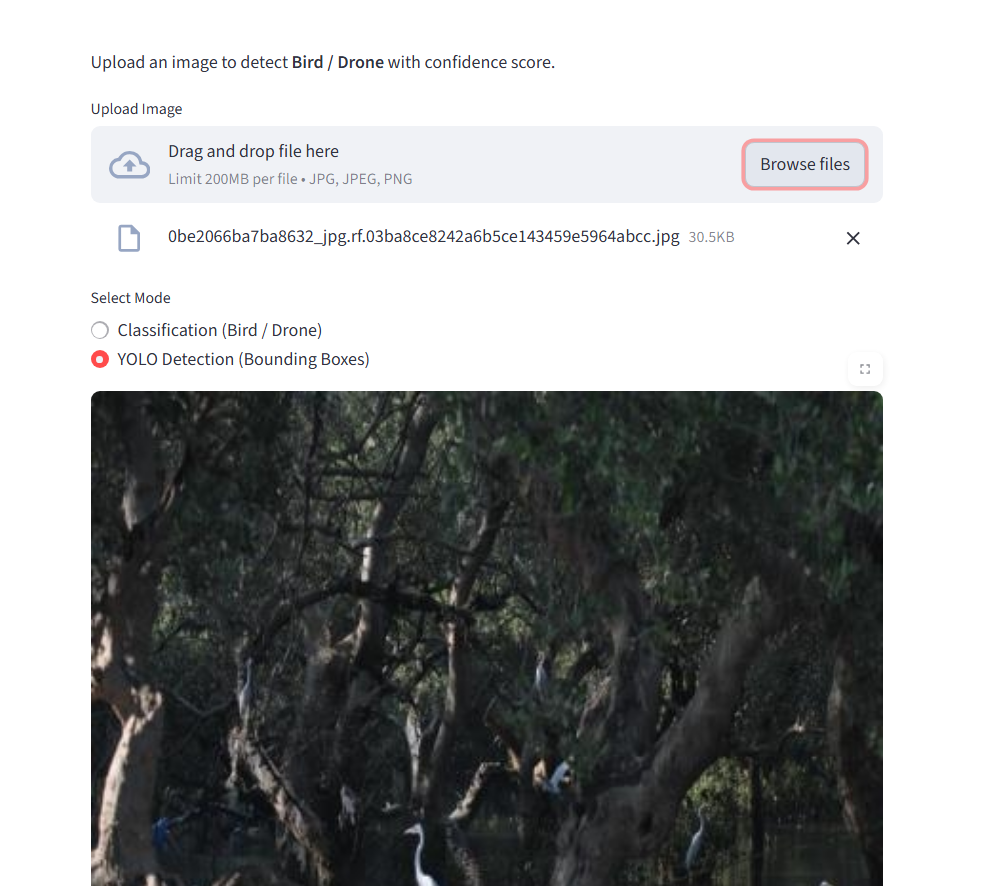




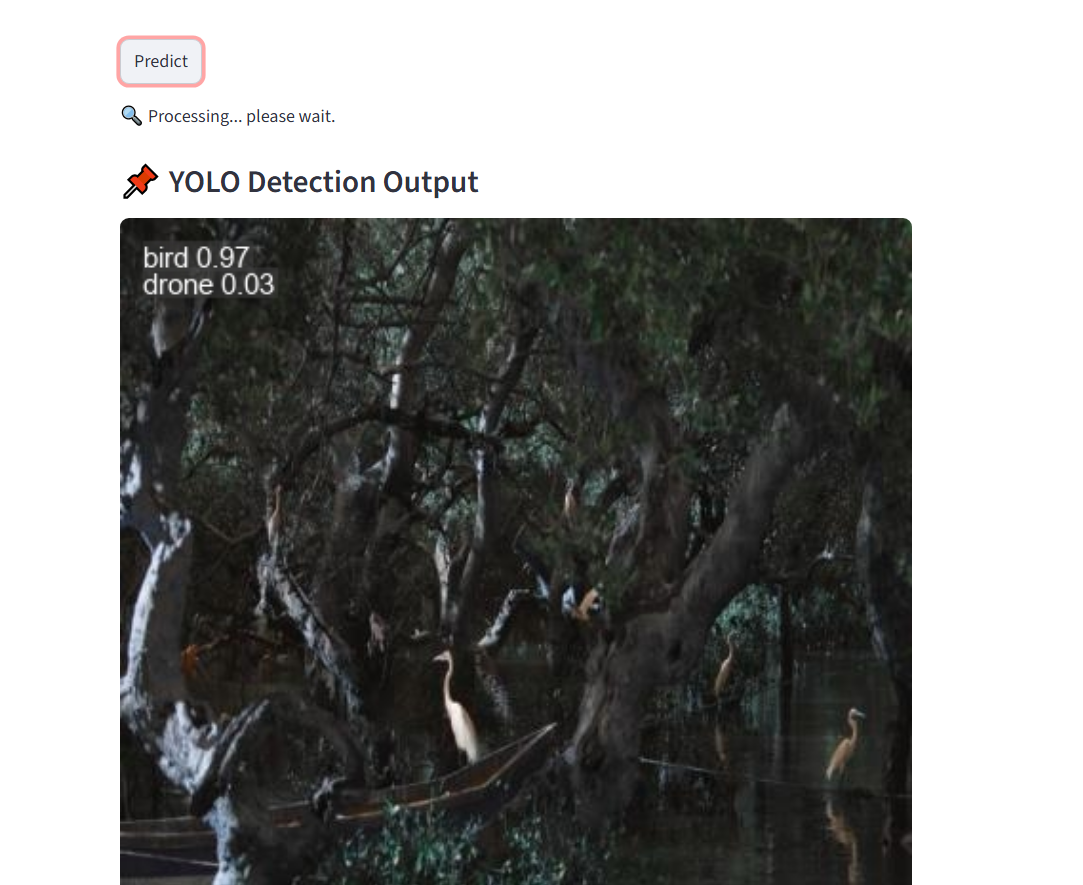

Correctly predict it's a bird

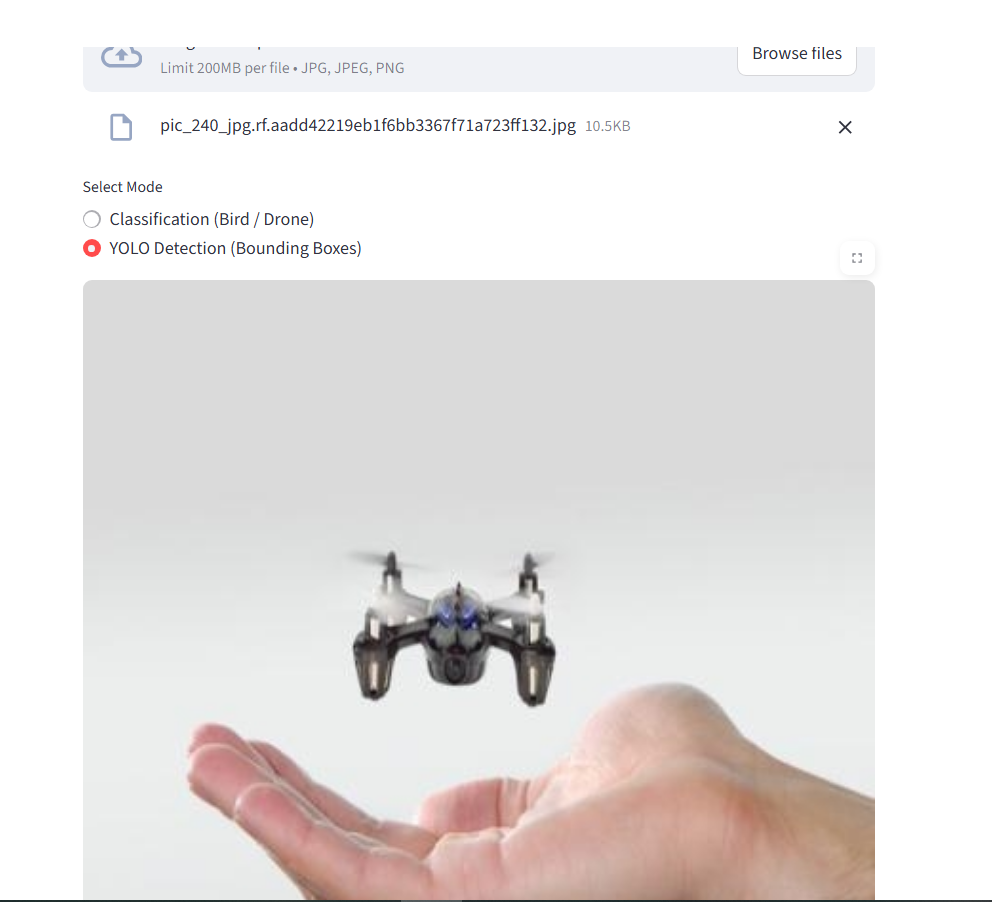

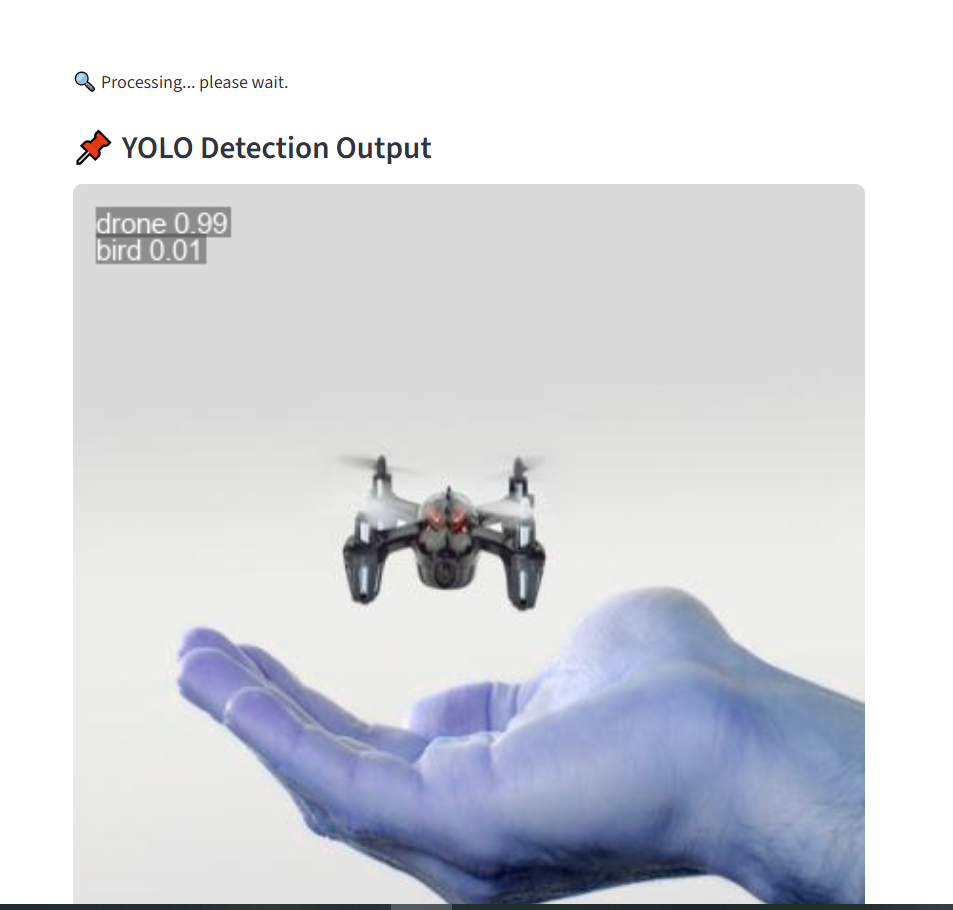

Correctly predict it's a drone

Thank you